We visualize how a traffic light that is turned green or red impacts traffic

In [1]:
import sys
sys.path.append('../src')

import torch
import road as rd
import traffic_lights as tl
import junction as jn
import traffic_lights as tl
import network as nw
import initial_and_bc as ibc
import loading_json as load
import json

In [7]:
# Creating the roads
L = 25
N = 2
b = 4
init_fnc = lambda x : torch.ones_like(x) * 0.2
boundary_fnc = ibc.boundary_conditions(1, max_dens=1, densities=torch.tensor([0.2]), time_jumps=[], 
                                       in_speed=torch.tensor(50.0/3.6), L = L)
road_1 = rd.Road(b, L, N, [torch.tensor(50/3.6)], [], initial=init_fnc, boundary_fnc=boundary_fnc,
                 left_pos=(0, 3), right_pos=(2.9, 3), id="road_1", max_dens=1)
road_2 = rd.Road(b, L, N, [torch.tensor(50/3.6)], [], initial=init_fnc, boundary_fnc=None,
                 left_pos=(3.1, 3), right_pos=(6, 3), id = "road_2", max_dens=1)

roads = [road_1, road_2]

# Creating the traffic light and the junction
traffic_light = tl.TrafficLightContinous(True, [0], [1], [torch.tensor(30.0), torch.tensor(100.0)])
junction = jn.Junction(roads, [0], [1], [[1.0]], [traffic_light], [])

# Creating the network
network = nw.RoadNetwork(roads, [junction], T = 100)

In [8]:
densities, _, _, _ = network.solve_cons_law()

In [9]:
densities_loaded = load.convert_from_tensor(densities)

In [10]:
import json
with open("results/traffic_lights.json", 'w') as fd:
    fd.write(json.dumps(densities_loaded))

#### Visualization of the activation function of a traffic light

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
import torch

In [6]:
def jump(x, start):
    return torch.sigmoid(x - (start + 5)) # Plus 5 to shift start of sigmoid to start

def derivative(x, start):
    return jump(x, start) * (1 - jump(x, start))

In [13]:
start_1 = 10
start_2 = 30
start_3 = 5
start_4 = 22
start_5 = 40
x = torch.linspace(0, 50, 200)
y = jump(x, start_1) - jump(x, start_2)
y_2 = 1. - jump(x, start_3) + jump(x, start_4) - jump(x, start_5)
grad = derivative(x, start_1) - derivative(x, start_2)

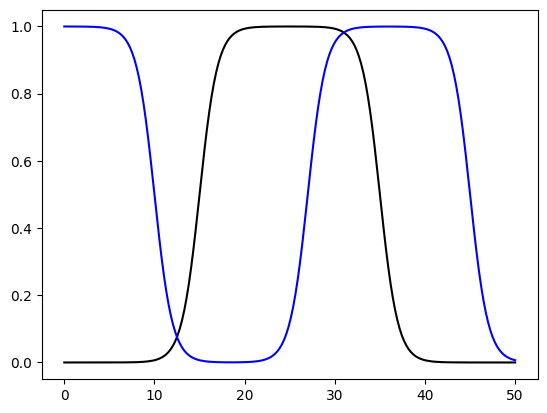

In [15]:
fig = plt.figure()

plt.plot(x, y, 'k', label = "Activation")
plt.plot(x, y_2, 'b', label = "Activation")

# plt.plot(x, grad, 'b', linestyle = "dashed", label = "Derivative")

tikzplotlib.save("../figurer/traffic_light.tex")
# plt.show()

#### Activation function of logistic function including its derivative

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
import torch

In [2]:
# torch.sigmoid(x) # Plus 5 to shift start of sigmoid to start

def derivative(x):
    return torch.sigmoid(x) * (1 - torch.sigmoid(x))

In [6]:
x = torch.linspace(-10, 10, 200)
y =torch.sigmoid(x)
grad = derivative(x)

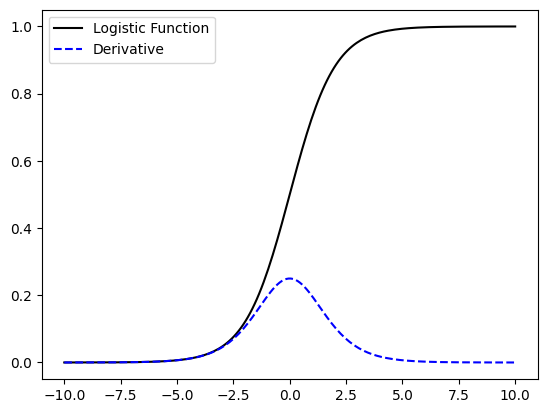

In [10]:
fig = plt.figure()

plt.plot(x, y, 'k', label = "Logistic Function")
plt.plot(x, grad, 'b', linestyle = "dashed", label = "Derivative")
plt.legend()
tikzplotlib.save("../figurer/logistic.tex")

### Convert gif to mp4 and crop it

In [1]:
import ffmpy

In [5]:
ff = ffmpy.FFmpeg(
    executable="C:\\Users\\torje\\Downloads\\ffmpeg-6.1-win-64\\ffmpeg.exe",
    inputs={'gifs/traffic_lights.gif': None},
    outputs={'videos/traffic_lights.mp4': None}
    )
ff.run()

(None, None)

In [1]:
from moviepy.editor import VideoFileClip,concatenate_videoclips
import moviepy.editor as mpy
from moviepy.video.fx.all import crop

In [7]:
clip = VideoFileClip('videos/traffic_lights.mp4')
cropped_clip = crop(clip, width=700, height=300, x_center=400, y_center=200)
cropped_clip = cropped_clip.cutout(0, 0.1)
cropped_clip.write_videofile('videos/traffic_lights_cropped.mp4',codec="libx264")

Moviepy - Building video videos/traffic_lights_cropped.mp4.
Moviepy - Writing video videos/traffic_lights_cropped.mp4



Moviepy - Done !
Moviepy - video ready videos/traffic_lights_cropped.mp4
